In [5]:
#VIDEO 10 - REGRESIÓN LOGÍSTICA
import pandas as pd 
from sklearn import metrics #metrics para validar nuestro método
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

diabetes=pd.read_csv('diabetes.csv')

In [6]:
diabetes.shape #Muestra la cantidad de pacientes y columnas

(768, 9)

In [7]:
diabetes.head(10) #Para ver los primeros 10 elementos de un dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:
feature_cols=['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction'] 
x=diabetes[feature_cols] #Los datos de las columnas estas, se guardan en x 
y=diabetes.Outcome #Guardo en Y los datos que me dicen si tiene o no diabetes. Me quedo con el resultado 0-1

In [9]:
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.25, random_state=42) #Se hace la división del 80-20% test size es el tamaño del testeo, o sea que el train es 75

In [10]:
logreg=LogisticRegression() #Llamo al algoritmo LogisticRegression, se guarda en la variable logreg 
logreg.fit(x_train, y_train) #Fit: Sirve para entrenar 
y_pred=logreg.predict (x_test)#En la variable y_pred hago la predicción con el método predict. Predice sobre los datos de x 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [11]:
y_pred #Esto es para ver cómo clasificó la información. 1: tiene diabetes y 0: no tiene diabetes. 

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [12]:
#VIDEO 13 - REGRESIÓN LOGÍSTICA CON SCIKIT LEARN - EVALUACIÓN DEL MODELO
#Dos formas de evaluar: 1) Matriz de confusión 2)La exactitud o accuracy 
#1)MATRIZ DE CONFUSIÓN
cnf_matrix=metrics.confusion_matrix(y_test, y_pred) #Genera la matriz de confusión
cnf_matrix

array([[95, 28],
       [25, 44]])

Text(0.5, 257.44, 'Etiqueta de predicción')

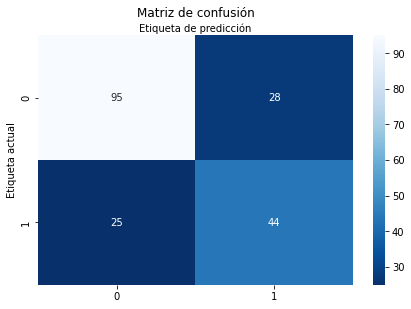

In [13]:
#Función adicional para plotear y que se vea más graficamente:
import numpy as np                    #Importa numpy porque la función es de numpy
class_names=[0,1]                     #Si tiene o no diabetes (0,1)
fig,ax=plt.subplots()                 #Plotea para que se vea gráfico
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks, class_names)   #Para que muestre tanto x como y
plt.yticks(tick_marks, class_names)

#Arriba se define la matriz de confusión y a partir de aquí se muestra:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues_r', fmt ='g')#cmap muestra una info gráfica en diferentes tonos de azul
ax.xaxis.set_label_position('top')    #Lo posiciona en la parte superior
plt.tight_layout()                    #Genera el layout
plt.title('Matriz de confusión', y=1.1)#Le pone los títulos 
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta de predicción')

In [14]:
#2)ACCURACY O LA EXACTITUD:
print("Exactitud", metrics.accuracy_score(y_test, y_pred)) #Calcula qué tan cercano a 100 es la exactitud en %

Exactitud 0.7239583333333334
